## <div style="background-color: #BAE3BC; padding: 10px;"><b>Exercicis d'algoritmes de Classificació</b>

</div>

### Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Importem el dataset</b>

</div>

Primer de tot importem el dataset per veure una mica les variables de manera ràpida.

In [2]:
wine = pd.read_csv("wineData.txt", header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Si fem un repàs ràpid del dataset sense noms, podem començar a intuir que el nostre target podria ser la columna "0", perquè és l'únic qué a primera vista porta valors diferents i concrets que podrien semblar d'una categorització. Ho mirarem amb més detall més endavant.

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Entenen el dataset</b>

</div>

Farem servir el recurs "wineNames" per entendre de qué es tracte el dataset, quins són els atributs i quin seria el nostre target.

In [3]:
wineNames = open("wineNames.txt")
print(wineNames.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

Ara que h'em vist les característiques del dataset, podem corrobar el que pensavem. Per una banda tenim 13 atributs qué són propietats químiques de vins cultivats en una regió d'Italia. Però el dataset sencer comprèn en general són 14 columnes, sent la columne "0" aquella que porta la classe del vi (1, 2 i 3), és a dir una variable de tipus nominal perquè no té implícit un ordre o jerarquia.

#### Posem nom a les columnes

In [4]:
wine.columns=['Class',' Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',' Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols',"Proanthocyanins", "Color intensity", 
"Hue", "OD280/OD315 of diluted wines", "Proline"]

wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


####  Veiem que alguns noms son una mica llargs, per tant per tal de tenir una lectura més senzilla els tornarem a anomenar.

In [5]:
wine.columns = ["Class", "Alc", "Mal_ac", "Ash", "A_ash", "Magne", "T_phen", "Fla", "Nfla_phen", "Proan", "Color", "Hue", "OD_OD", "Prol"]
wine.head()

,Class,Alc,Mal_ac,Ash,A_ash,Magne,T_phen,Fla,Nfla_phen,Proan,Color,Hue,OD_OD,Prol
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Definim cada atribut

1.  **Alc**: La quantitat d'alcohol en percentatge de volum en el vi.
2.  **Mal_ac**: La quantitat d'àcid màlic en grams per litre en el vi.
3.  **Ash**: La quantitat de cendra en grams per litre en el vi.
4.  **A_ash**: La mesura de l'alcalinitat de la cendra en unitats de pH en el vi.
5.  **Magne**: La quantitat de magnesi en mil·ligrams per litre en el vi.
6.  **T_phen**: La quantitat total de fenols en mil·ligrams per litre en el vi.
7.  **Fla**: La quantitat de flavonoïdes en mil·ligrams per litre en el vi.
8.  **Nfla_phen**: La quantitat de fenols no flavonoïds en mil·ligrams per litre en el vi.
9.  **Proa**: La quantitat de proantocianidines en mil·ligrams per litre en el vi.
10. **Color**: L'absorbància a 420 nm de la llum que passa a través del vi.
11. **Hue**: La tonalitat del vi mesurada en una escala de 0 a 1.
12. **OD_OD**: La relació entre les absorbàncies mesurades a 280 nm i 315 nm.
13. **Prol**: La quantitat de proline en mil·ligrams per litre en el vi.

#### Ara mirarem quantes entrades té el dataset i quins tipus de dades trobarem

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class      178 non-null    int64  
 1   Alc        178 non-null    float64
 2   Mal_ac     178 non-null    float64
 3   Ash        178 non-null    float64
 4   A_ash      178 non-null    float64
 5   Magne      178 non-null    int64  
 6   T_phen     178 non-null    float64
 7   Fla        178 non-null    float64
 8   Nfla_phen  178 non-null    float64
 9   Proan      178 non-null    float64
 10  Color      178 non-null    float64
 11  Hue        178 non-null    float64
 12  OD_OD      178 non-null    float64
 13  Prol       178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


El dataset conté 178 entrades i 14 columnes. Segons el tipus de dades tots els atributs són o continus ('Class','Magnesi' i 'Proline') o discrets (tota la resta de atributs). Els atributs discrets ('Magnesi' i 'Proline') són de tipus 'int64' i malgrat podrien haver sigut continus donada la seva naturalesa, a l'estudi han decidit posar valors discrets. Ja hem parlat de qué 'Class' serà el target perquè correspon a una variable categórica o nominal.

Segons l'informació que ens entrega el mètode .info sembla que el dataset no conté dades nulls, peró això ho revisarem i confirmarem ara mateix.

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Exploració del dataset</b>

</div>

Primer de tot, confirmarem que no existeixin nulls. També revisarem si hi ha nan's i duplicats.

In [7]:
wine.isnull().sum()

Class        0
Alc          0
Mal_ac       0
Ash          0
A_ash        0
Magne        0
T_phen       0
Fla          0
Nfla_phen    0
Proan        0
Color        0
Hue          0
OD_OD        0
Prol         0
dtype: int64

In [8]:
wine.isna().sum()

Class        0
Alc          0
Mal_ac       0
Ash          0
A_ash        0
Magne        0
T_phen       0
Fla          0
Nfla_phen    0
Proan        0
Color        0
Hue          0
OD_OD        0
Prol         0
dtype: int64

In [9]:
wine.duplicated().sum()

0

<AxesSubplot:>

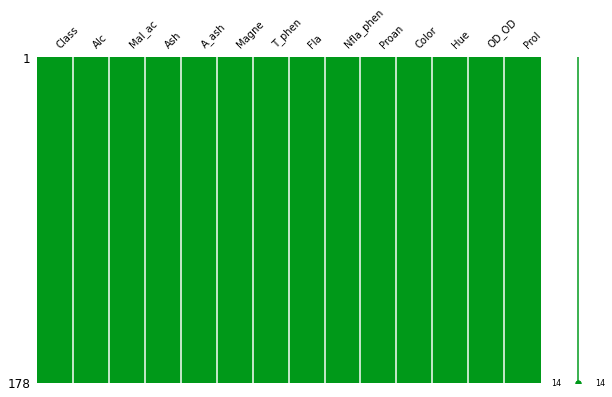

In [10]:
msno.matrix(wine, color=(0.0, 0.6, 0.1), figsize=(10,6),fontsize=10)

Hem comprovat que el dataset no conté nulls, tampoc nans, ni duplicats. Finalment hem aportat una forma de observar la distribució dels duplicats amb la llibreria missigno. Si tiguessim nulls al dataset, la barra asociada a algun atribut canviaria la seva forma. Però, com no tenim dades faltants doncs tenim un rectangle perfecte.

### Distribució del nostra target

Hem vist que la columna que representa el nostre target conté categories, però no sabem quantes són ni com es distribueixen. Doncs, ja que aquesta serà la variable a predir farem una representació ràpida per veure com es comporten les dades de la columna 'Class'.

In [11]:
wine['Class'].nunique()

3

In [12]:
wine['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

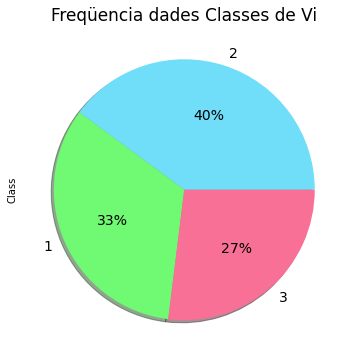

In [13]:
plt.figure(figsize=(8,6))
plt.title('Freqüencia dades Classes de Vi', fontsize=17)
c = ['#70DEF9', '#70F972', '#F97097']

wine['Class'].value_counts().plot(kind='pie',autopct='%.0f%%', shadow=True, colors=c, textprops={'fontsize': 14})

plt.show()

Les dades dins del nostre target 'Class' es troben distribuïdes de manera relativament heterogènia. La 'Class' dominant és la 2 amb 71 registres, seguit per la 1 amb 59 i la més petita amb 48 registres.

### Altres estadístiques del dataset

In [14]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alc,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Mal_ac,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
A_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magne,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
T_phen,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Fla,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nfla_phen,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proan,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Resumen de les coses més importants del 'describe':

1. A primera vista podriem intuir que les variables tenen un comportament bastant equilibrat. Això, perquè veiem que les mitjas i la mitjana es troben bastant aprop, excepte en casos particulars com a 'mal_ac', 'Color' i 'Prol' on  veiem certa diferència.
2. Si mirem les desviacions stàndard, l'anàlisi segueix un camí semblant al del punt 1. Es a dir, que els tres atributs ('mal_ac', 'Color' i 'Prol') porten una desviació aparentment més alta que els altres atributs i per tant que possiblement ens trobarem amb dades més disperses en aquests atributs.
3. Una cosa que no hem dit fins ara, és que les dades no es troben estandaritzades ni escalades. Aixó dificulta la lectura i comparació en aquesta part de l'anàlisi i per descomptet ens crida a fer els preprocessats correponents per efectes d'aplicar models d'aprenentatge automatitzats.

#### Ara mirarem com és la correlació entre tots els atributs del dataset

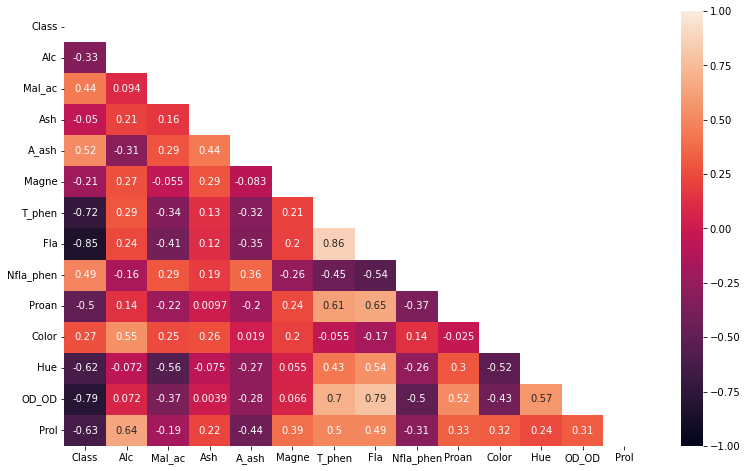

In [15]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(wine.corr()))

sns.heatmap(wine.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.show()

Alguns comentaris de l'anàlisi de correlació del dataset:

1. El nostre target 'Class' té un correlació forta amb dos atributs ('OD_OD' i 'Fla') amb un 80% i un 85% corresponenment. desprès tenim un tercer atribut amb correlació alta ('T_Phen'). S'ha de dir que totes aquestes altes correlacions són negatives o inversament proporcionals.
2. En un segon grup tindriam amb una correlació que ens desperta interès els atributs 'Prol' i 'Hue' amb un 63% i 62% respectivament. També negatius.
3. Fins ara, amb aquestes dades i aquest nivell d'anàlisi podem dir que cap atribut té una alta correlació positiva amb el target.
4. Per un altre banda ,podem destacar que el atribut OD_OD, no només té una alta correlació amb el nostre target, sinó que també la en té amb 'T_phen' i 'Fla'(però aquí de manera possitiva). També hem de dir que aquests últims atributs mencionats tenen entre ells mateixos la correlació més alta del dataset amb 86% (positiva).
5. Per una altre banda, atributs com 'Color' i 'Magne' o 'Fla' i 'Magne' o 'Ash' i 'Alc', tenen de les correlacions més baixes del dataset.



#### Un anàlisi molt important abans de fer qualsevol preprocessament és observar si els atributs tenen dades outliers. Aprofitarem per veure també la seva distribució i començar a intuir si és normal o no.

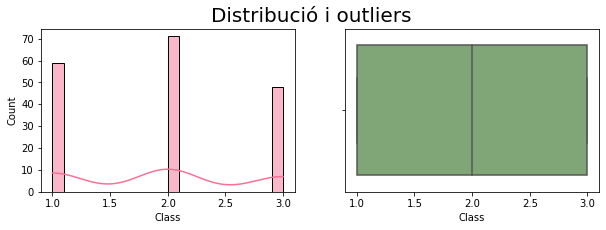

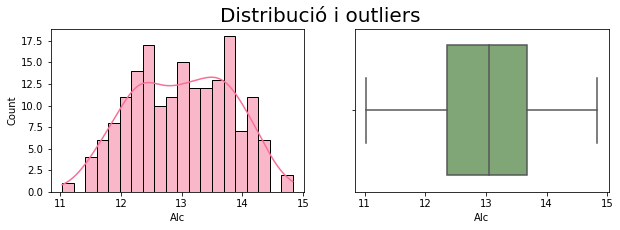

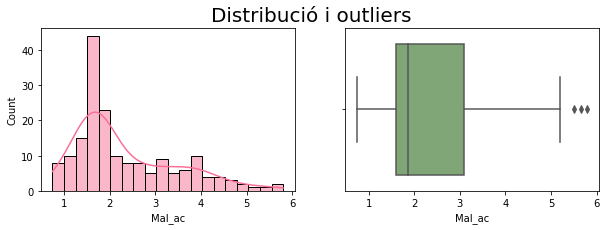

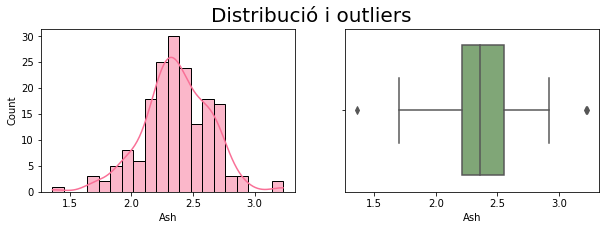

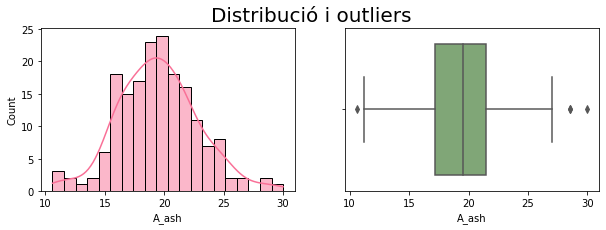

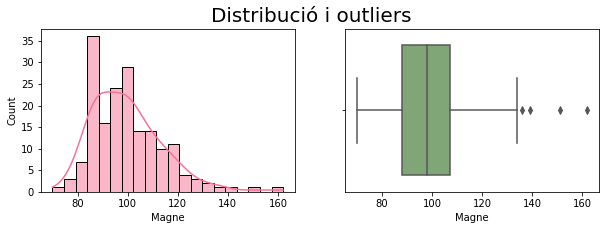

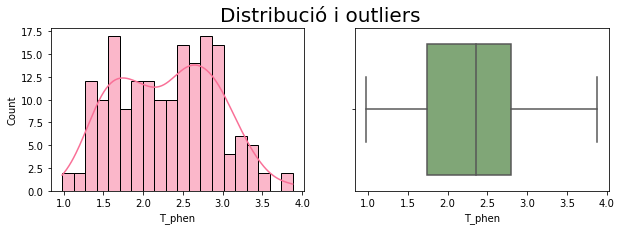

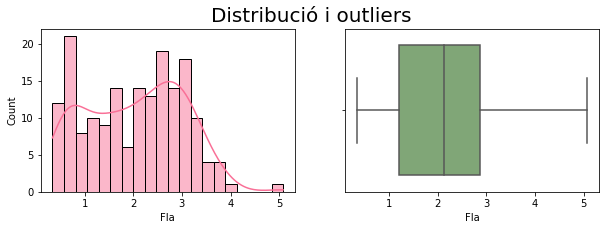

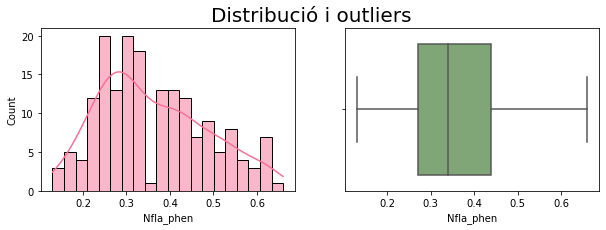

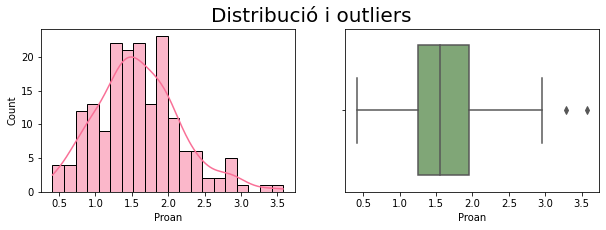

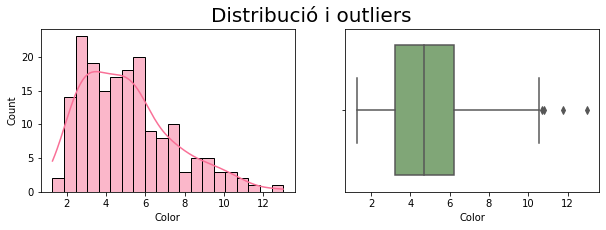

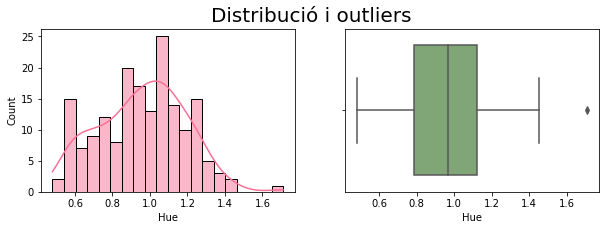

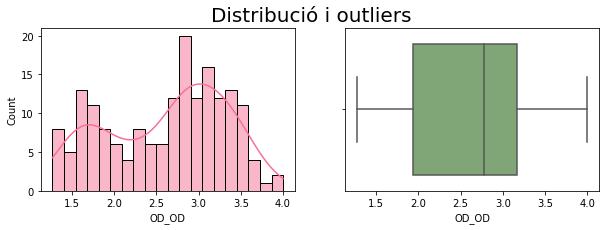

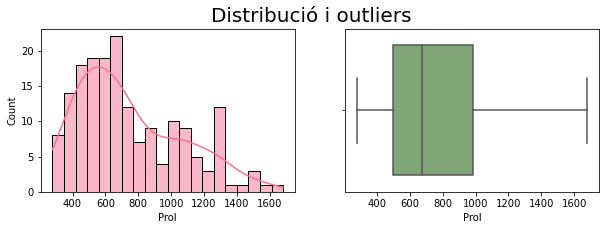

In [16]:
for atribut in wine:
    fig, axes = plt.subplots(1,2, figsize = (10,3))
    fig.suptitle('Distribució i outliers', fontsize=20)
    sns.histplot(data=wine, ax=axes[0],  x=wine[atribut], bins=20, color='#F97097', kde=True)
    sns.boxplot(ax=axes[1], x =wine[atribut], color='#7BAE6F')
    

plt.show()

Alguns comentaris:

1. A través del histograma podem veure que les dades en alguns atributs tenen un biaix cap a l'esquerra o cap a la dreta. Per exemple en el gràfic del atribut 'Color', ja haviem comentat que hi havia una diferència entre la mitjana i la mitja. Aquí podem veure com les dades tenen una forta tendencia cap a l'esquerra.
2. Per un altre costat, és difícil assegurar només amb aquestes gràfiques si alguna distribució és normal. Aparentment la majoria sembla que no ho és. Potser un parell si que ho podrien ser ('Ash','A_ash'). Però, aixó ho comprovarem en els següents apartats.
3. En quant els boxplots podem resumir que els atributs ('Mal_ac', 'Ash', 'A_ash', 'Magne', 'Proan', 'Color' i 'Hue') contenen outliers. Amb aquests atributs probablement es farà una normalització específica com a preprocessament.

### Revisem quins atributs tenen distribució normal

Comprovarem el següent per tots els atributs del datset:
    
1.    Hipòtesi nul·la (H0): La mostra té una distribució normal
2.    Hipòtesi alternativa (H1): La mostra no té una distribució normal

In [17]:
from scipy import stats

for i in wine.columns:
    shapiro_test = stats.shapiro(wine[i])
    print('La variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('\033[1mNo podem\033[0m rebutjar hipotesis nula, la mostra \033[1mTé\033[0m una distribució normal.\n')
    else:
        print("\033[1mPodem\033[0m rebutjar l'hipotesis nula, la mostra \033[1mNo té\033[0m una distribució normal.\n")

La variable  Class amb un p-value de  3.526998097335039e-14
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable  Alc amb un p-value de  0.02005171775817871
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable  Mal_ac amb un p-value de  2.9459296113643063e-10
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable  Ash amb un p-value de  0.03868526220321655
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable  A_ash amb un p-value de  0.26386943459510803
No podem rebutjar hipotesis nula, la mostra Té una distribució normal.

La variable  Magne amb un p-value de  6.345416068143095e-07
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable  T_phen amb un p-value de  0.004395752213895321
Podem rebutjar l'hipotesis nula, la mostra No té una distribució normal.

La variable  Fla amb un p-value de  1.6790636436780915e-05
Podem rebutja

### Resumen abans del preprocessat

Com ja sabem hem de normalitzar i estandaritzar el nostre dataset (menys el target) per poder aplicar posteriorment models de machine learning. Ara que ja sabem quins atributs tenen una distribució gaussiana i quins no, i a més a més sabem quins atributs tenen outliers, podem definir quines tècniques farem servir:

1. StandardScaler (gaussianes): 'A_ash'
2. RobustScaler   (no gaussianes amb outliers):  ['Mal_ac', 'Ash', 'Magne', 'Proan', 'Color' i 'Hue']
3. ScalerNorm     (no gussianes sense outliers): ['Alc', 'T_phen', 'Fla', 'Nfla_phen', 'OD_OD', 'Prol']

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Preprocessat</b>

</div>

In [18]:
from sklearn import preprocessing

# Fit and Transform with StandarScaler
sts = preprocessing.StandardScaler().fit(wine[['A_ash']])
wine['A_ash'] = sts.transform(wine[['A_ash']])

# Fit and Transform with RobustScaler
robs = preprocessing.RobustScaler().fit(wine[['Mal_ac', 'Ash', 'Magne', 'Proan', 'Color', 'Hue']])
wine[['Mal_ac', 'Ash', 'Magne', 'Proan', 'Color', 'Hue']] = robs.transform(wine[['Mal_ac', 'Ash', 'Magne', 'Proan', 'Color', 'Hue']])

# Fit and transform with ScalerNorm

sn = preprocessing.MinMaxScaler().fit(wine[['Alc', 'T_phen', 'Fla', 'Nfla_phen', 'OD_OD', 'Prol']])
wine[['Alc', 'T_phen', 'Fla', 'Nfla_phen', 'OD_OD', 'Prol']] = sn.transform(wine[['Alc', 'T_phen', 'Fla', 'Nfla_phen', 'OD_OD', 'Prol']])

wine.head(10)

,Class,Alc,Mal_ac,Ash,A_ash,Magne,T_phen,Fla,Nfla_phen,Proan,Color,Hue,OD_OD,Prol
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
5,1,0.834211,-0.070946,0.258993,-1.289707,0.736842,0.789655,0.643460,0.396226,0.592857,0.691275,0.251852,0.578755,0.835949
6,1,0.884211,0.003378,0.258993,-1.469878,-0.105263,0.524138,0.459916,0.320755,0.607143,0.187919,0.162963,0.846154,0.721826
7,1,0.797368,0.192568,0.719424,-0.569023,1.210526,0.558621,0.457806,0.339623,-0.435714,0.120805,0.281481,0.846154,0.725392
8,1,1.000000,-0.152027,-0.546763,-1.650049,-0.052632,0.627586,0.556962,0.301887,0.607143,0.171141,0.340741,0.578755,0.547076
9,1,0.744737,-0.347973,-0.258993,-1.049479,0.000000,0.689655,0.592827,0.169811,0.421429,0.848993,0.133333,0.835165,0.547076


Podem veure que els atributs es troben normalitzats i/o escalats. farem servir un boxplot per comprar les seves mitjanes i distribucions.

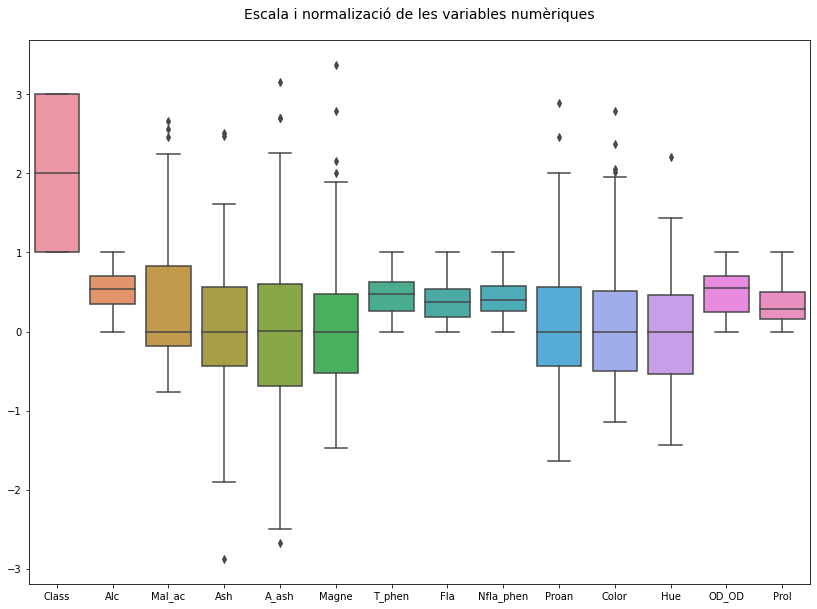

In [19]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=wine)
plt.title('Escala i normalizació de les variables numèriques\n', size = 14)
plt.show()

Veiem com totes les dades es troben entre 0 i 1 (per descomptat les seves mitjanes també, menys el target). Veiem també que el atribut 'A_ash' té una dispersió important, juntament amb 'Ash', 'Magne' i 'Proan'. A continuació dividirem el dataset en Train i test per tal de fer servir aquestes dades en diferents models de classificació.

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Divisió Train / Test</b>

</div>

In [20]:
X = wine.drop(['Class'],axis=1)
y = wine['Class'] #Target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Shape X_train:", X_train.shape, "\nShape X_test:", X_test.shape, 
      "\nShape y_train:", y_train.shape, "\nShape y_test:",y_test.shape)

Shape X_train: (142, 13) 
Shape X_test: (36, 13) 
Shape y_train: (142,) 
Shape y_test: (36,)


### <div style="background-color: #D3DDF7; padding: 10px;"><b>Produir Models</b>

</div>

Tenim moltes possibilitats a l'hora de escollir un model de classificació. Existeixen almenys més de deu models popularment coneguts al món del ML. Podriem diferir més o menys. Aquí us presento una llista:

1. Logistic regression
2. Decision trees
3. Random forests
4. Support vector machines (SVM)
5. Artificial neural networks
6. K-nearest neighbors (KNN)
7. Naive Bayes
8. Gradient boosting
9. AdaBoost
10. XGBoost

Escolliré doncs tres dels més utilitzats: Logistic Regression, Random Forests i Support Vector Machines. Aquests, segons el que he investigats podrien tenir bona resposta per un dataset de classificació de vins com el que tenim.

### Instanciant el model

Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Support Vector Machines (SVM)

In [22]:
from sklearn.svm import SVC
svc = SVC()

Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

### Ajustant el model

In [24]:
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

### Predint Resultats

In [25]:
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)

### Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

1. Aplicant **"Accuracy"** els nostres models

In [26]:
from sklearn.metrics import accuracy_score

ac_lr = accuracy_score(y_test, y_pred_lr)
ac_svc = accuracy_score(y_test, y_pred_svc)
ac_rf = accuracy_score(y_test, y_pred_rf)

metrics = pd.DataFrame({'Tipus Model': ['Logistic Regression', 'SVM','Random Forest'],'Accuracy': [ac_lr, ac_svc, ac_rf]})
metrics

,Tipus Model,Accuracy
0,Logistic Regression,0.944444
1,SVM,0.944444
2,Random Forest,0.972222


Com primer anàlisi podem dir que els tres models estan classificant correctament una gran proporció de mostres en el conjunt de dades de prova. Tant així que per al model 'SVM' el 94% de les dades de prova han sigut classicades correctament.La Logistic Regression també aconsegueix un 94% d'efectivitat i el Random Forest un 97% sent el millor. Tots són percetatges molt alts i hem de tenir en compte més endavant la probabilitat de 'overfitting' o sobreajustament.

Per poder tenir certesa de tenir models consistents hem d'aplicar altres mètriques per mesurar els seus errors i fer evaluacions creuades que ens aportin informació sobre un sobreajustament.

2. Aplicant **"La Matriu de confusió"** els nostres models

Farem un plot comparatiu de les tres matrius de confusió per els nostres tres models de manera de poder veure fàcilment els encerts i desencerts.

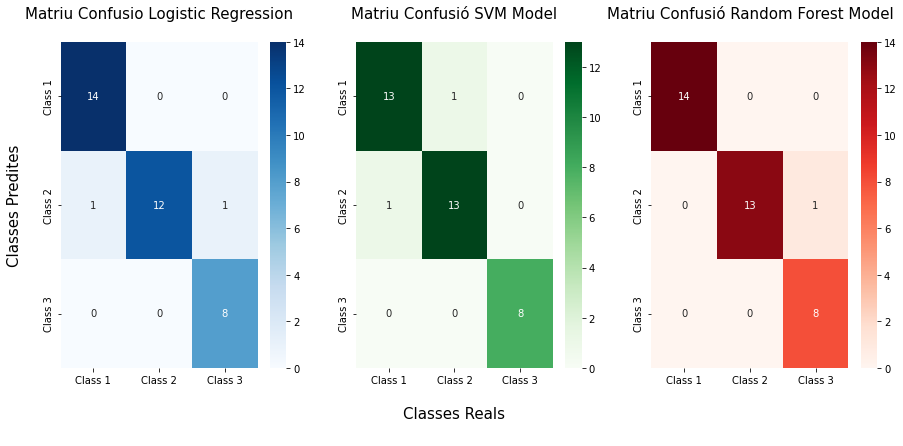

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

Classes = ['Class 1','Class 2','Class 3']

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
a = pd.DataFrame(confusion_matrix(y_test, y_pred_lr), columns=Classes, index =Classes)
i = sns.heatmap(a, annot=True, fmt='d',cmap="Blues")
i.set_title('Matriu Confusio Logistic Regression\n', fontsize=15)
i.set_ylabel('Classes Predites\n',fontsize=15)

plt.subplot(1,3,2)
a = pd.DataFrame(confusion_matrix(y_test, y_pred_svc), columns=Classes, index =Classes)
i = sns.heatmap(a, annot=True, fmt='d',cmap="Greens")
i.set_title('Matriu Confusió SVM Model\n', fontsize=15)
i.set_xlabel('\nClasses Reals\n',fontsize=15)

plt.subplot(1,3,3)
a = pd.DataFrame(confusion_matrix(y_test, y_pred_rf), columns=Classes, index =Classes)
i = sns.heatmap(a, annot=True, fmt='d',cmap="Reds")
i.set_title('Matriu Confusió Random Forest Model\n',fontsize=15)

plt.show()


La mètrica 'accuracy' ja ens parlava d'una molt bona resposta dels nostres models. Però, qué és el que realment ens aporten aquestes noves gráficas?

1. Recordem que tenim 36 mostres que són les que estem fent servir en els nostres models. El 'accuracy' és una mesura que es calcula per el total de la mostra. Però, amb la matriu podem veure la seva distribució de encerts i desencerts. Si posem la mirada en el primer model (Logistic Regression), podem dir el següent:

A. De les 14 mostres de la classe 1, el model ha predit correctament en el 100% de les mostres.

B. De les 14 mostres de la classe 2, el model ha predit correctament en el 83,3% de les mostres.

C. De les 8 mostres de la classe 3, el model ha predit correctament en el 100% de les mostres.
    
És a dir, que per una banda dependerà dels nostres objectius si ens serveix que les classes tinguin una disparitat en el percetatge d'encert i d'altre que hem de vigilar el balanceig de les mostres per classe. Això, perquè un model entrenat amb diferents quantitats de mostres (com és el nostre cas) podria tenir una millor resposta en aquells grups més robustos.
    
També es molt important dir que existeixen altres mètriques per poder tenir una evaluació més consistent. Si només ens quedem amb l'accuracy i la matriu de confusió podriem incórrer en biaixos sense voler o sense assabentar-nos.

3. Aplicant **F1** els nostres models.

In [28]:
from sklearn.metrics import f1_score

f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

In [29]:
metrics['f1_macro'] = [f1_lr, f1_svc, f1_rf]
metrics

,Tipus Model,Accuracy,f1_macro
0,Logistic Regression,0.944444,0.943257
1,SVM,0.944444,0.952381
2,Random Forest,0.972222,0.968046


El que estem fent amb el F1 es afegir un altre paràmetre (l'exhaustivitat) conjuntament amb la precisió. Quan les classes tenen un desequilibri en el nombre de mostres, aquesta mètrica es de especial utilitat.

Com a resutats comparats entre 'Accuracy' i 'F1' veiem que el F1 té lleument menys valoració en la Regressió Logistica i un millor comportament en el Random Forest. Aixó en fa pensar que és una molt bona mesura per un dataset i una predicció del tipus que estem representant. El model SVM segons aquesta mètrica segueix tenint resultats perfectes.

Hem de dir per descomptat, que tenim un dataset petit i desequilibrat en les seves classes. Això pot fer que el model no sigui del tot fiable. Fins ara podriem dir que no anem per mal camí.

### Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

3.1 Buscant millors Hiperparameters model Regressió Logística

In [30]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()

# definim paràmetres relevants
parm_grid = dict()
parm_grid['C'] = [1, 5, 10]
parm_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
parm_grid['penalty'] = ["l1", "l2", "elasticnet"]

#definim grid
search_lr = RandomizedSearchCV(estimator=lr, param_distributions = parm_grid, n_iter=14, scoring = 'f1_macro', cv=10, random_state=42)

#ajustem el model
search_lr.fit(X, y)

print("Best score F1 is ", search_lr.best_score_)
print("Best Hyper-parameters Logistic regression are : \n", search_lr.best_params_)

Best score F1 is  0.9944055944055943
Best Hyper-parameters Logistic regression are : 
 {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


3.2 Buscant millors Hiperparameters model SVM

In [32]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

svc = SVC()

# definim paràmetres relevants
parm_grid2 = dict()
parm_grid2['C'] = [0.1, 1, 5, 10]
parm_grid2['kernel'] = ["linear", "poly", "rbf"]
parm_grid2['gamma'] = ["auto", "scale", 0.01, 0.1, 2]

#definim grid
search_svc = RandomizedSearchCV(estimator=svc, param_distributions = parm_grid2, n_iter=14, scoring = 'f1_macro', cv=10, random_state=42)

#ajustem el model
search_svc.fit(X, y)

print("Best score SVM is ", search_svc.best_score_)
print("Best Hyper-parameters SVM are : \n", search_svc.best_params_)

Best score SVM is  0.9543058793058792
Best Hyper-parameters SVM are : 
 {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


3.3 Buscant millors Hiperparameters model Random Forest

In [34]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

# definim paràmetres relevants
parm_grid3 = dict()
parm_grid3['max_depth'] = [None, 2, 3, 5]
parm_grid3['n_estimators'] = [50, 75, 100, 125, 150, 175, 200]
parm_grid3['oob_score'] = [True, False]

#definim grid
search_rf = RandomizedSearchCV(estimator=rf, param_distributions = parm_grid3, n_iter=14, scoring = 'f1_macro', cv=10, random_state=42)

#ajustem el model
search_rf.fit(X, y)

print("Best score RF is ", search_rf.best_score_)
print("Best Hyper-parameters RF are : \n", search_rf.best_params_)

Best score RF is  0.9892773892773892
Best Hyper-parameters RF are : 
 {'oob_score': False, 'n_estimators': 100, 'max_depth': None}


3.4 Millorant els models amb els hiperparàmetres trobats

3.4.1 Tornem a fer les prediccions dels models amb els nous hiperparàmetres i calcular els seus errors

3.4.1.1 Posem els nous millors paràmetres per a cada model

In [36]:
lr_hp = LogisticRegression(solver = 'liblinear', penalty = 'l2', C= 10, random_state=42)
svc_hp = SVC(kernel= 'linear', gamma = 'auto', C= 10)
rf_hp = RandomForestClassifier(random_state=42, oob_score=True, n_estimators= 50, max_depth= None)

3.4.1.2 Ajustem i predim els models

In [37]:
lr_hp.fit(X_train, y_train)
y_pred_lr_hp = lr_hp.predict(X_test)

svc_hp.fit(X_train, y_train)
y_pred_svc_hp = svc_hp.predict(X_test)

rf_hp.fit(X_train, y_train)
y_pred_rf_hp = rf_hp.predict(X_test)

3.4.1.3 Calculem Accuracy i F1 amb els nous paràmetres

In [38]:
#accuracy
ac_lr_hp = accuracy_score(y_test, y_pred_lr_hp) 
ac_svc_hp = accuracy_score(y_test, y_pred_svc_hp) 
ac_rf_hp = accuracy_score(y_test, y_pred_rf_hp) 

#f1_macro
f1_lr_hp = f1_score(y_test, y_pred_lr_hp, average='macro') 
f1_svc_hp = f1_score(y_test, y_pred_svc_hp, average='macro') 
f1_rf_hp = f1_score(y_test, y_pred_rf_hp, average='macro')

3.4.1.4 Afegim els nous resultats el dataframe resumen

In [39]:
metrics['Accuracy_hp'] = [ac_lr_hp, ac_svc_hp, ac_rf_hp]
metrics['F1_macro_hp'] = [f1_lr_hp, f1_svc_hp, f1_rf_hp]
metrics.round(4)

,Tipus Model,Accuracy,f1_macro,Accuracy_hp,F1_macro_hp
0,Logistic Regression,0.9444,0.9433,0.9722,0.9762
1,SVM,0.9444,0.9524,0.9722,0.9680
2,Random Forest,0.9722,0.9680,1.0000,1.0000


### Comentaris

Veiem com aplicant hiperparàmetres a través de RandomizedSearch hem pujat totes les mètriques dels models. L'accuracy ha pujat a un 97,2% a la Logistic Regression i al SVM. Mentre que el Random Forest ens dona 100% tant en l'accuracy com el F1. hem anat vigilant de no incórrer en "overffiting" declarant els models previament. Si mirem un percentatge de 100% d'accuracy potser podriem estar fent-lo. Per això més endavant farem la "cross validation" i analitzarem si ens dona resultats consistents. Potser hem aconseguit un model fantàstic pel nostre dataset.

### Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [40]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr_hp = LogisticRegression(solver = 'liblinear', penalty = 'l2', C= 10, random_state=42)
svc = SVC()
svc_hp = SVC(kernel= 'linear', gamma = 'auto', C= 10)
rf = RandomForestClassifier()
rf_hp = RandomForestClassifier(random_state=42, oob_score=True, n_estimators= 50, max_depth= None)

Calculem Cross Validation

In [41]:
lr_cv = cross_val_score(lr, X, y, cv=10, scoring='f1_macro').mean()
lr_hp_cv = cross_val_score(lr_hp, X, y, cv=10, scoring='f1_macro').mean()
svc_cv = cross_val_score(svc, X, y, cv=10, scoring='f1_macro').mean()
svc_hp_cv = cross_val_score(svc_hp, X, y, cv=10, scoring='f1_macro').mean()
rf_cv = cross_val_score(rf, X, y, cv=10, scoring='f1_macro').mean()
rf_hp_cv = cross_val_score(rf_hp, X, y, cv=10, scoring='f1_macro').mean()

metrics['CV_F1_Macro'] = [lr_cv, svc_cv, rf_cv]
metrics['CV_F1_Macro_hp'] = [lr_hp_cv, svc_hp_cv, rf_hp_cv]

metrics.round(4)

,Tipus Model,Accuracy,f1_macro,Accuracy_hp,F1_macro_hp,CV_F1_Macro,CV_F1_Macro_hp
0,Logistic Regression,0.9444,0.9433,0.9722,0.9762,0.9605,0.9837
1,SVM,0.9444,0.9524,0.9722,0.9680,0.9604,0.9485
2,Random Forest,0.9722,0.9680,1.0000,1.0000,0.9840,0.9784


Calculem Cross Validation Std

In [42]:
lr_cv_std = cross_val_score(lr, X, y, cv=10, scoring='f1_macro').std()
lr_hp_cv_std = cross_val_score(lr_hp, X, y, cv=10, scoring='f1_macro').std()
svc_cv_std = cross_val_score(svc, X, y, cv=10, scoring='f1_macro').std()
svc_hp_cv_std = cross_val_score(svc_hp, X, y, cv=10, scoring='f1_macro').std()
rf_cv_std = cross_val_score(rf, X, y, cv=10, scoring='f1_macro').std()
rf_hp_cv_std = cross_val_score(rf_hp, X, y, cv=10, scoring='f1_macro').std()

metrics['CV_F1_Macro_std'] = [lr_cv_std, svc_cv_std, rf_cv_std]
metrics['CV_F1_Macro_hp_std'] = [lr_hp_cv_std, svc_hp_cv_std, rf_hp_cv_std]

metrics.round(4)

,Tipus Model,Accuracy,f1_macro,Accuracy_hp,F1_macro_hp,CV_F1_Macro,CV_F1_Macro_hp,CV_F1_Macro_std,CV_F1_Macro_hp_std
0,Logistic Regression,0.9444,0.9433,0.9722,0.9762,0.9605,0.9837,0.0523,0.0250
1,SVM,0.9444,0.9524,0.9722,0.9680,0.9604,0.9485,0.0523,0.0344
2,Random Forest,0.9722,0.9680,1.0000,1.0000,0.9840,0.9784,0.0250,0.0264


### Comentaris

Si mirem totes les mètriques disposades al llarg del dataframe "metrics", no hi ha cap dubte que hem fet servir tres models que s'ajusten molt bé el dataset en qüestió. Hem anat vigilant tots els passos i hem anat aplicant conscientment les mètriques i hiperparàmetres que la literatura ens suggereix.
Sabem que mentre més alta la precissió i més baixa sigui la desviació standard, el model tindrà major consistència i fiabilitat. Aquest és el nostre cas, perquè gràcies a la validació creuada hem vist que l'accuracy és consistent a totes les mètriques. Per un altre banda, el càlcul de la desvació standard reafirma la fiabilitat dels models amb i sense canvi d'hiperparàmetres.